In [1]:
import pandas as pd # for data manipulation
import numpy as np # for linear algebra
import matplotlib.pyplot as plt # for plotting

# <p style= "background-color:#428da6;font-family:Georgia;padding: 6px;color:#FFFFFF;font-size:110%;text-align:center;border-radius:30px 60px;overflow:hidden;">Loading Dataset</p>

In [2]:
# Getting path of dataset
dataset_path = 'train.csv'

In [3]:
# Loading dataset
df = pd.read_csv(dataset_path)

# Displaying our data
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,6128,s6129,TV Show,The Big Family Cooking Showdown,NaN,"Zoe Ball, Nadiya Hussain, Giorgio Locatelli, R...",United Kingdom,"February 22, 2019",2018,2,"In this unscripted series, families passionate...",British TV
1,7018,s7019,TV Show,The World's Most Extraordinary Homes,NaN,"Piers Taylor, Caroline Quentin",United Kingdom,"January 18, 2019",2019,3,Award-winning architect Piers Taylor and actre...,British TV
2,4657,s4658,TV Show,One-Punch Man,NaN,"Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Ao...",Japan,"March 20, 2017",2015,1,The most powerful superhero in the world can k...,Anime Series
3,6167,s6168,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,"March 1, 2019",2019,114,"Inspired by a science book, 13-year-old Willia...",Children
4,3562,s3563,Movie,"LeapFrog: Sing-along, Read-along",Ron Myrick,"Julie Maddalena, Cindy Robinson",NaN,"April 15, 2020",2011,32,"Using rhythm and rhymes, a funky band and a co...",Children


# <p style= "background-color:#428da6;font-family:Georgia;padding: 6px;color:#FFFFFF;font-size:110%;text-align:center;border-radius:30px 60px;overflow:hidden;">Data Cleaning</p>


In [4]:
# Displaying our data
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,6128,s6129,TV Show,The Big Family Cooking Showdown,NaN,"Zoe Ball, Nadiya Hussain, Giorgio Locatelli, R...",United Kingdom,"February 22, 2019",2018,2,"In this unscripted series, families passionate...",British TV
1,7018,s7019,TV Show,The World's Most Extraordinary Homes,NaN,"Piers Taylor, Caroline Quentin",United Kingdom,"January 18, 2019",2019,3,Award-winning architect Piers Taylor and actre...,British TV
2,4657,s4658,TV Show,One-Punch Man,NaN,"Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Ao...",Japan,"March 20, 2017",2015,1,The most powerful superhero in the world can k...,Anime Series
3,6167,s6168,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,"March 1, 2019",2019,114,"Inspired by a science book, 13-year-old Willia...",Children
4,3562,s3563,Movie,"LeapFrog: Sing-along, Read-along",Ron Myrick,"Julie Maddalena, Cindy Robinson",NaN,"April 15, 2020",2011,32,"Using rhythm and rhymes, a funky band and a co...",Children


In [6]:
# Dropping unneeded features 
df = df.drop(["show_id", "date_added",'Unnamed: 0'], axis=1) # , "description", "cast"

In [7]:
# Printing shape of dataframe
df.shape

(6223, 9)

In [8]:
# Checking number of missing values
df.isna().sum()

type               0
title              0
director        1893
cast             569
country          423
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [9]:
# Dropping missing values
df = df.dropna()

# Checking number of missing values
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [10]:
# Checking the number of identical records
df.duplicated().sum()

0

In [11]:
# Printing shape of dataframe
df.shape

(3855, 9)

<div style="background-color:#D4EDDA; color:#155724; padding:20px; border-radius:10px; text-align:center;">
    <h3 style="font-style:italic; margin-top:0;">🔍 Search:</h3>
    <p style="margin-bottom:0; background-color:#D4EDDA; display:inline-block; padding:5px; border-radius:5px; font-size:15px;">Most basic things have been done to dataframe. Let's explore other things. Let's see if all features have correct data types</p>
</div>

In [12]:
# Checking data types
df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [13]:
# Displaying our data
df.head()

,type,title,director,cast,country,release_year,duration,description,genre
3,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,2019,114,"Inspired by a science book, 13-year-old Willia...",Children
5,Movie,Mutiny of the Worker Bees,Carlos Morett,"Gustavo Egelhaaf, Alejandro Suárez, Bárbara de...",Mexico,2020,94,When Omar's grandfather forces him to get a jo...,Comedies
6,Movie,John Carter,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",United States,2012,133,"One minute, Civil War veteran John Carter is e...",Action
7,Movie,Kung Fu Yoga,Stanley Tong,"Jackie Chan, Disha Patani, Amyra Dastur, Sonu ...",China,2017,107,Two mismatched archaeologists battle a team of...,Action
9,Movie,Lady Bird,Greta Gerwig,"Saoirse Ronan, Laurie Metcalf, Tracy Letts, Lu...",United States,2017,94,An intrepid high schooler in Sacramento underg...,Comedies


In [14]:
# Displaying feature
df.duration.head()

3    114
5     94
6    133
7    107
9     94
Name: duration, dtype: int64

# <p style= "background-color:#428da6;font-family:Georgia;padding: 6px;color:#FFFFFF;font-size:110%;text-align:center;border-radius:30px 60px;overflow:hidden;">Preprocessing</p>

### Extracting features

In [17]:
# Splitting data into X and target
X = df.drop('title', axis=1)
title = df['title']

### Encoding and scaling all features

In [21]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer

# Creating an instance of the preprocessing classes
mms = MinMaxScaler()
ohe = OneHotEncoder(drop='first')
ctv = CountVectorizer()

# Creating a make_column_transformer object
preprocessor = make_column_transformer(
    (mms, ['release_year']),
    (mms, ['duration']),
    (ohe, ['type', 'director']),
    (ctv, 'country'),
    (ctv, 'genre')
)

# Performing the preprocessing operation
X_processed  = preprocessor.fit_transform(X)

X_processed 

<3855x3122 sparse matrix of type '<class 'numpy.float64'>'
	with 21879 stored elements in Compressed Sparse Row format>

In [22]:
# Converting sparse matrix to normal array
X_processed = X_processed.toarray()

X_processed

array([[0.97468354, 0.47881356, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98734177, 0.3940678 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88607595, 0.55932203, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97468354, 0.18644068, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96202532, 0.30084746, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97468354, 0.40254237, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# <p style= "background-color:#428da6;font-family:Georgia;padding: 6px;color:#FFFFFF;font-size:110%;text-align:center;border-radius:30px 60px;overflow:hidden;">Building Autoencoder</p>

In [23]:
from keras.metrics import cosine_similarity
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

# Metric to test the accuracy of reconstructed features
def cosine_similarity_metric(y_true, y_pred):
    return tf.reduce_mean(cosine_similarity(y_true, y_pred))

# Function for building diffrent models using keras_tuner
def build_model(hp):
    input_shape = X_processed.shape[1]
    input_layer = Input(shape=(input_shape,))
    
    outer_units = hp.Int('outer_units', min_value=128, max_value=256, step=64)
    inner_units = hp.Int('inner_units', min_value=32, max_value=128, step=32)
    bottleneck = hp.Int('bottleneck', min_value=8, max_value=32, step=8)

    hidden_layer1 = Dense(units=outer_units, activation='relu')(input_layer)
    hidden_layer2 = Dense(units=inner_units, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(units=bottleneck, activation='relu')(hidden_layer2)
    hidden_layer4 = Dense(units=inner_units, activation='relu')(hidden_layer3)
    hidden_layer5 = Dense(units=outer_units, activation='relu')(hidden_layer4)
    
    output_layer = Dense(units=input_shape, activation='sigmoid')(hidden_layer5)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse', metrics=[cosine_similarity_metric])
    
    return model

In [26]:
from keras_tuner import BayesianOptimization

# Creating BayesianOptimization instance
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=5, # number of different architectures
    executions_per_trial=2) # number of repeats given architecture

In [25]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [27]:
# Information about what space of parameters are search for
tuner.search_space_summary()

Search space summary
Default search space size: 3
outer_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
inner_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
bottleneck (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}


In [28]:
# Running BayesianOptimization tuner
tuner.search(X_processed, X_processed, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Trial 5 Complete [00h 01m 02s]
val_loss: 0.0006615068414248526

Best val_loss So Far: 0.0006615068414248526
Total elapsed time: 00h 06m 01s


In [29]:
from tensorflow.keras.utils import plot_model

# Loading best model
autoencoder = tuner.get_best_models(num_models=1)[0]

# Displaying a graphical representation of the best model
plot_model(autoencoder, show_shapes=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Retraining Best model

In [30]:
# Training best architecture
history = autoencoder.fit(X_processed, X_processed, epochs=50)

Epoch 1/50
121/121 [==============================] - 2s 9ms/step - loss: 6.0820e-04 - cosine_similarity_metric: 0.7649
Epoch 2/50
121/121 [==============================] - 1s 9ms/step - loss: 6.0600e-04 - cosine_similarity_metric: 0.7655
Epoch 3/50
121/121 [==============================] - 1s 8ms/step - loss: 6.0549e-04 - cosine_similarity_metric: 0.7658
Epoch 4/50
121/121 [==============================] - 1s 9ms/step - loss: 6.0453e-04 - cosine_similarity_metric: 0.7658
Epoch 5/50
121/121 [==============================] - 1s 8ms/step - loss: 6.0226e-04 - cosine_similarity_metric: 0.7676
Epoch 6/50
121/121 [==============================] - 1s 9ms/step - loss: 5.9963e-04 - cosine_similarity_metric: 0.7692
Epoch 7/50
121/121 [==============================] - 1s 9ms/step - loss: 5.9592e-04 - cosine_similarity_metric: 0.7712
Epoch 8/50
121/121 [==============================] - 1s 9ms/step - loss: 5.9409e-04 - cosine_similarity_metric: 0.7721
Epoch 9/50
121/121 [====================

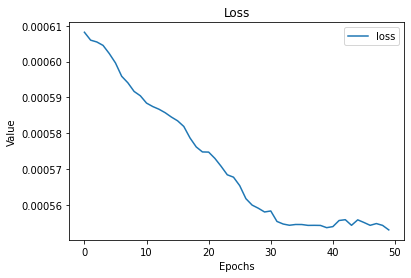

In [31]:
# Plotting loss
plt.plot(history.history['loss'], label='loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

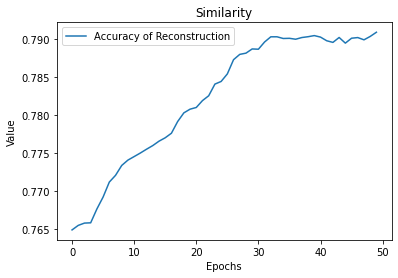

In [32]:
# Plotting cosine_similarity_metric
plt.plot(history.history['cosine_similarity_metric'], label='Accuracy of Reconstruction')
plt.title('Similarity')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# <p style= "background-color:#428da6;font-family:Georgia;padding: 6px;color:#FFFFFF;font-size:110%;text-align:center;border-radius:30px 60px;overflow:hidden;">Recomending movies</p>

#### In this step i am using trained autoencoder and cosine similarity metric to recomend which movies to watch next.

In [38]:
# Choosing a movie
movie = "The Conjuring" 

# Getting index of a movie
movie_index = title.index[title == movie][0] 

# Getting features of that movie
movie_features = X_processed[movie_index] 

movie_features

array([0.86075949, 0.45338983, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# How many movies to recomend
N_movies = 10

# Generating reconstruction of features using autoencoder
reconstructed_movie = autoencoder.predict(np.array([movie_features]))[0]

# Comparing choosen movie to the rest
similarities = cosine_similarity(X_processed, [reconstructed_movie])
similarities[movie_index] = -1  # Making sure the original movie will not be recomended
most_similar_indices = np.argsort(similarities, axis=0)[::-1][:N_movies]  # Getting Indexes of 10 most similar movies

most_similar_indices

1/1 [==============================] - 0s 28ms/step


array([[2041],
       [3624],
       [1752],
       [3215],
       [3727],
       [3327],
       [1386],
       [2144],
       [2684],
       [2779]], dtype=int64)

In [40]:
# Printing recomended movies
for recomended_movie in most_similar_indices:
    print(*title.values[recomended_movie]) 

Tattah
My Horrible Grandma
Good and Prosperous
Scarecrow
Flimflam
Bittersweet
Bewildered Bolbol
Monopoly (The Bank Of Luck)
X Large
The Consul's Son
